# A* Search Project Template

This notebook will help you implement and visualize A* search on a grid-based maze.

## Objectives:
- Load a 2D grid
- Implement A* search
- Visualize the explored path
- Compare performance with BFS for large maze, like size = thousands

In [15]:
# Do not change
# Generate a unique sizexsize maze with random obstacles, a start, and a goal
import random

def generate_maze(seed=None, size=10):
    if seed is not None:
        random.seed(seed)
    grid = [['.' for _ in range(size)] for _ in range(size)]
    num_walls = random.randint((int(size/1.8)**2), int((size/1.5)**2))                           #<--- number of wals
    for _ in range(num_walls):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x][y] = '#'
    
    # Place start and goal
    randomly = True
    if randomly:
        while True:
            sx, sy = random.randint(0, size-1), random.randint(0, size-1)
            gx, gy = random.randint(0, size-1), random.randint(0, size-1)
            if (sx != gx or sy != gy) and grid[sx][sy] == '.' and grid[gx][gy] == '.':
                grid[sx][sy] = 'S'
                grid[gx][gy] = 'G'
                break
    else:
        grid[0][0] = 'S'
        grid[size-1][size-1] = 'G'
    
    return grid


In [25]:
# no need to change
from collections import deque

def bfs(grid, start, goal):
    queue = deque()
    queue.append((start, [start]))  # (current_position, path_so_far)
    visited = set()

    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path

        if current in visited:
            continue
        visited.add(current)

        x, y = current
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
                if grid[nx][ny] != '#' and (nx, ny) not in visited:
                    queue.append(((nx, ny), path + [(nx, ny)]))
    
    return None  # No path found

In [27]:
# A* search implementation
import heapq

def astar(grid, start, goal):
    # your implementation
    
    return None

In [29]:
# Do not change

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import copy  # for deep copying the grid

def grid_to_array(grid):
    cmap = {'#': 0, '.': 1, '*': 2, 'S': 3, 'G': 4, }
    nrows, ncols = len(grid), len(grid[0])
    array = np.zeros((nrows, ncols))
    for i in range(nrows):
        for j in range(ncols):
            array[i][j] = cmap.get(grid[i][j], 1)
    return array

def plot_maze_side_by_side(grid, alg, path=None):
    cmap = ListedColormap(['black', 'white', 'yellow', 'green', 'red'])

    # Create a deep copy of the original grid for path overlay
    grid_with_path = copy.deepcopy(grid)

    # Add path markers only to the copied grid
    if path:
        for (x, y) in path:
            if grid_with_path[x][y] not in ['S', 'G']:
                grid_with_path[x][y] = '*'
    
    # Convert to array representations
    original = grid_to_array(grid)
    #with_path = grid_to_array(grid)
    with_path = grid_to_array(grid_with_path)

    # Create subplot figure
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for ax, img, title in zip(axs, [original, with_path], ["Original Maze", "Maze with " + alg + " Path"]):
        ax.imshow(img, cmap=cmap, origin='upper')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        # Draw grid lines
        for x in range(len(grid) + 1):
            ax.axhline(x - 0.5, color='gray', lw=0.3)
        for y in range(len(grid[0]) + 1):
            ax.axvline(y - 0.5, color='gray', lw=0.3)

    plt.tight_layout()
    plt.show()

In [31]:
# Do not change, except seed and size for your own exploration

import time
# Run A* and visualize result

# create a maze
# grid = generate_maze(seed=12345, size=40)

grid = generate_maze(seed=1235, size=1000)
# Locate start and goal positions
for i, row in enumerate(grid):
    for j, val in enumerate(row):
        if val == 'S':
            start = (i, j)
        elif val == 'G':
            goal = (i, j)
      
# path = list of tuples such as [(x0,y0), (x1,y1), ...], (x0,y0) = start, ...
start_time = time.time()
path = astar(grid, start, goal)
end_time = time.time()

print(f"A* took {end_time - start_time:.6f} seconds")

if path:
    plot_maze_side_by_side(grid, "A*", path)
else:
    print("No path found")

A* took 0.000000 seconds
No path found


BFS took 3.641825 seconds


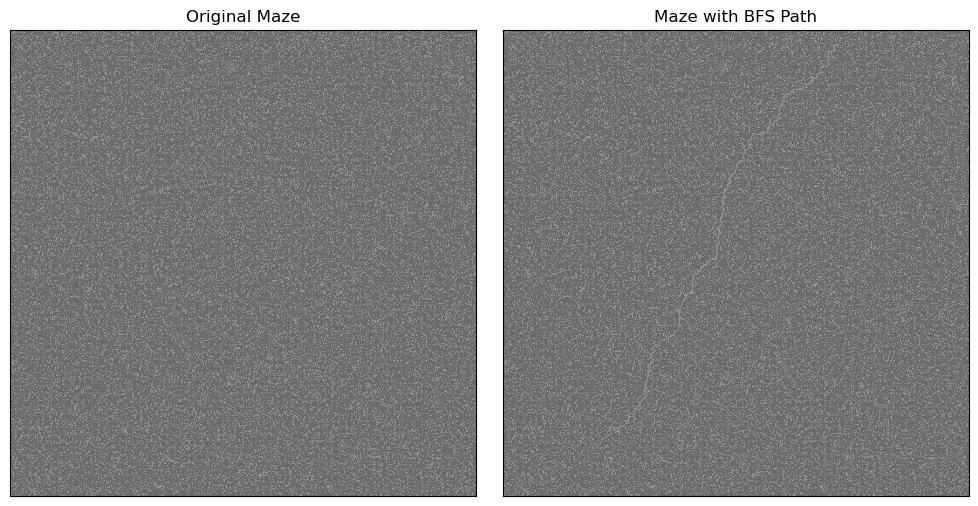

In [33]:
# Do not change, except seed and size for your own exploration
import time
# Run BFS and visualize result

# create a maze
grid = generate_maze(seed=1235, size=1000)

# Locate start and goal positions
for i, row in enumerate(grid):
    for j, val in enumerate(row):
        if val == 'S':
            start = (i, j)
        elif val == 'G':
            goal = (i, j)
      
# path = list of tuples such as [(x0,y0), (x1,y1), ...], (x0,y0) = start, ...
start_time = time.time()
path = bfs(grid, start, goal)
end_time = time.time()

print(f"BFS took {end_time - start_time:.6f} seconds")

if path:
    plot_maze_side_by_side(grid, "BFS", path)
else:
    print("No path found")